# Assignment Details

### You were interested in assessing the impact of therapeutic interventions in reducing police stress. You first identified a sample of 40 police officers who scored high on a stress scale. You then assign them randomly to 1 of 2 groups: Control (no intervention) and stress reduction through exercise (Physical).

### After one month, you give all participants a scale to measure their current level of life satisfaction (scores range from 0-100; higher score equals higher satisfaction). Assess whether there are differences between the two groups and ultimately whether your exercise intervention was successfull.

### Explaratory Data Analysis:

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
data = pd.read_excel("data.xlsx")

# create backup of data
df = data.copy()

In [3]:
# split data into control and intervention group and rename columns
control = df[df["Condition"] == 0]
control.rename(columns={"Condition":"condition_0", "Stress":"stress_0"}, inplace=True)

intervention = df[df["Condition"] == 1]
intervention.rename(columns={"Condition":"condition_1", "Stress":"stress_1"}, inplace=True)

##### Control Group
The control group had a mean stress score of 51.7 with a standard deviation of 16.6. This tells us that within one standard deviation, the stress scores are between the range of approximately 35.1 (51.7 - 16.6) and 68.3 (51.7 + 16.6) -> 35.1 < X < 68.3

Looking at the quartile statistics, we can see that 25% of the data includes stress scores of 46.0 and below, 50% of the data includes stress scores of 51.0 and below and 75% of the data includes stress scores of 54.25 and below with the min and max stress scores for the control group being 28.0 and 111.0 respectively

In [4]:
# compute summary statistics for control group
control.describe()["stress_0"].to_frame().T

,count,mean,std,min,25%,50%,75%,max
stress_0,20.0,51.7,16.600888,28.0,46.0,51.0,54.25,111.0


##### Intervention Group

The intervention group had a mean stress score of 65.9 with a standard deviation of 12.6. This tells us that within one standard deviation, the stress scores are between the range of approximately 53.3 (65.9 - 12.6) and 78.5 (65.9 + 12.6) -> 53.3 < X < 78.5

Looking at the quartile statistics, we can see that 25% of the data includes stress scores of 58.75 and below, 50% of the data includes stress scores of 63.5 and below and 75% of the data includes stress scores of 71.25 and below with the min and max stress scores for the control group being 43.0 and 88.0 respectively

In [5]:
# compute summary statistics for intervention group
intervention.describe()["stress_1"].to_frame().T

,count,mean,std,min,25%,50%,75%,max
stress_1,20.0,65.9,12.60284,43.0,58.75,63.5,71.25,88.0


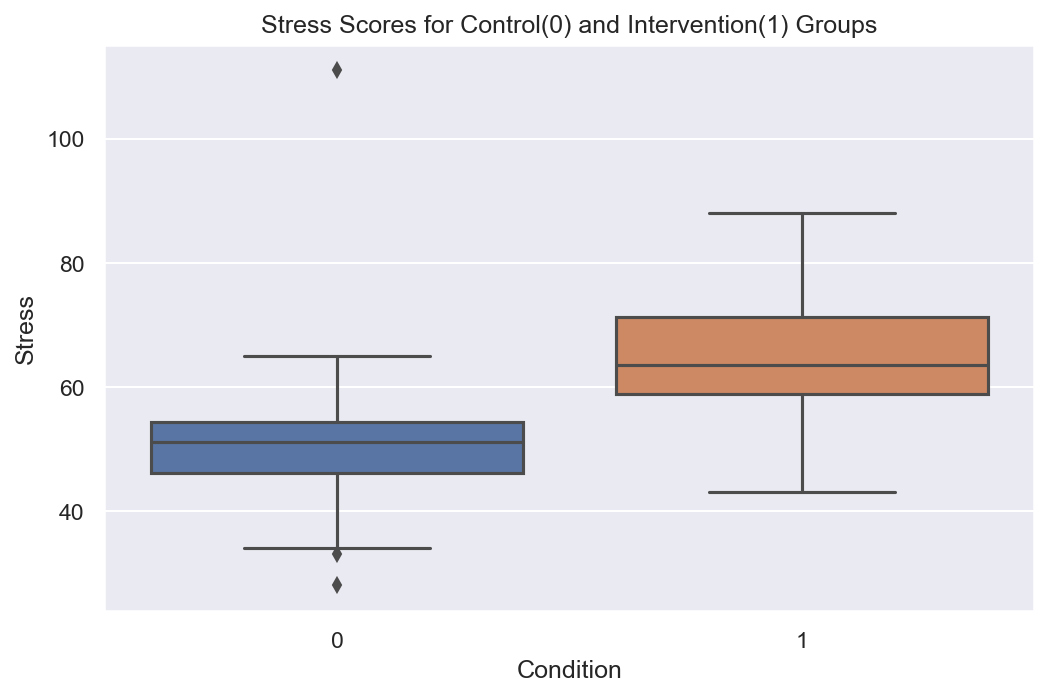

In [6]:
plt.figure(figsize=(8,5),dpi=150)
sns.boxplot(x="Condition",y="Stress",data=df)
plt.title("Stress Scores for Control(0) and Intervention(1) Groups",fontsize=12)

plt.show()

The boxplot above shows the distribution of the 2 groups. Visually, we can see that the intervention group has higher stress scores across all quartiles (25%, 50% and 75%) as well as higher minimum and maximum stress stress on average (discluding the outlier in the control group with a stress score of 111.0). We can also visually observe that the control group has a larger proportion of data in the 1st quartile, whereas the intervention group has a larger proportion of data in the 3rd quartile. This tells us that that there is some general trend, indicating that the parameters of each group has some effect on their overall stress scores.

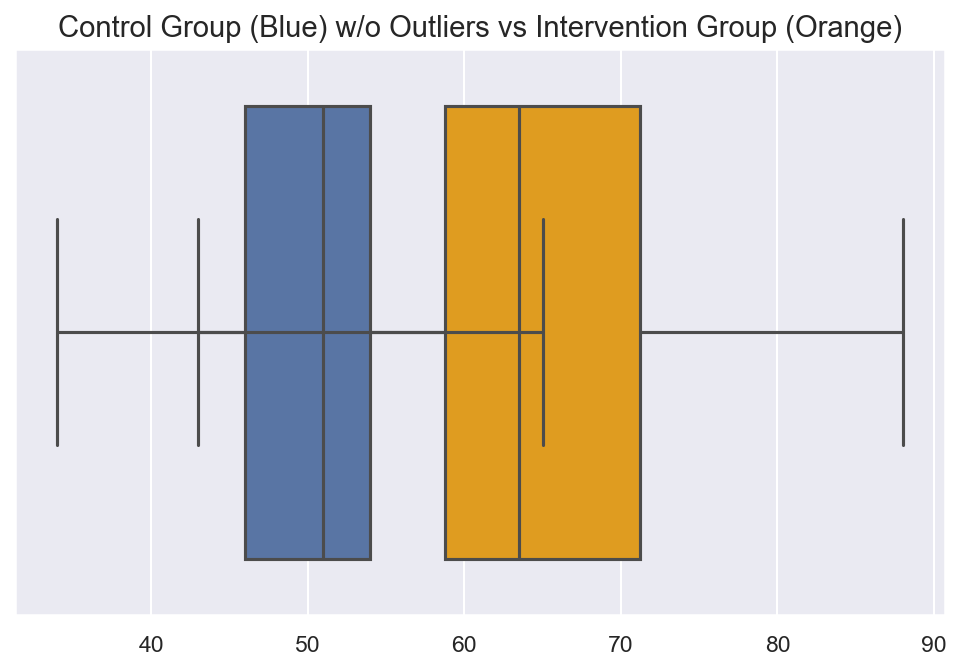

In [7]:
# combining data into single file with separate columns for control and intervention groups
df_merged = pd.read_excel("data_merged.xlsx")

plt.figure(figsize=(8,5), dpi=150)
sns.boxplot(x = df_merged["stress_0"].sort_values(ascending=True)[2:-1])
sns.boxplot(x = df_merged["stress_1"], color="orange")

plt.title("Control Group (Blue) w/o Outliers vs Intervention Group (Orange)", fontsize=14)
plt.xlabel("")

plt.show()

We can see a more drastic visual comparison of the 2 boxplots when outliers are accounted for. The intervention group's stress scores vastly supercedes that of the control group.

Let's see what happens to the descriptive statistics when the outlier data in the control group is accounted for.

First let's display the descriptive statistics without any changes made again:

In [8]:
control.describe()["stress_0"].to_frame().T

,count,mean,std,min,25%,50%,75%,max
stress_0,20.0,51.7,16.600888,28.0,46.0,51.0,54.25,111.0


Now, let's display the descriptive statistics after taking out the outlier identified by the boxplot:

In [9]:
control["stress_0"].sort_values()[2:-1].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
stress_0,17.0,50.705882,7.033533,34.0,46.0,51.0,54.0,65.0


The largest changes seem to be in the standard deviation and the min value, which makes sense as we have taken out outliers that may have contributed to skewing the data slightly, however, the quartile statistics seem to be pretty much the same, indicating that even without the outlier data points, the control group still has very similar stress scores (i.e. the distribution of the data doesn't change).

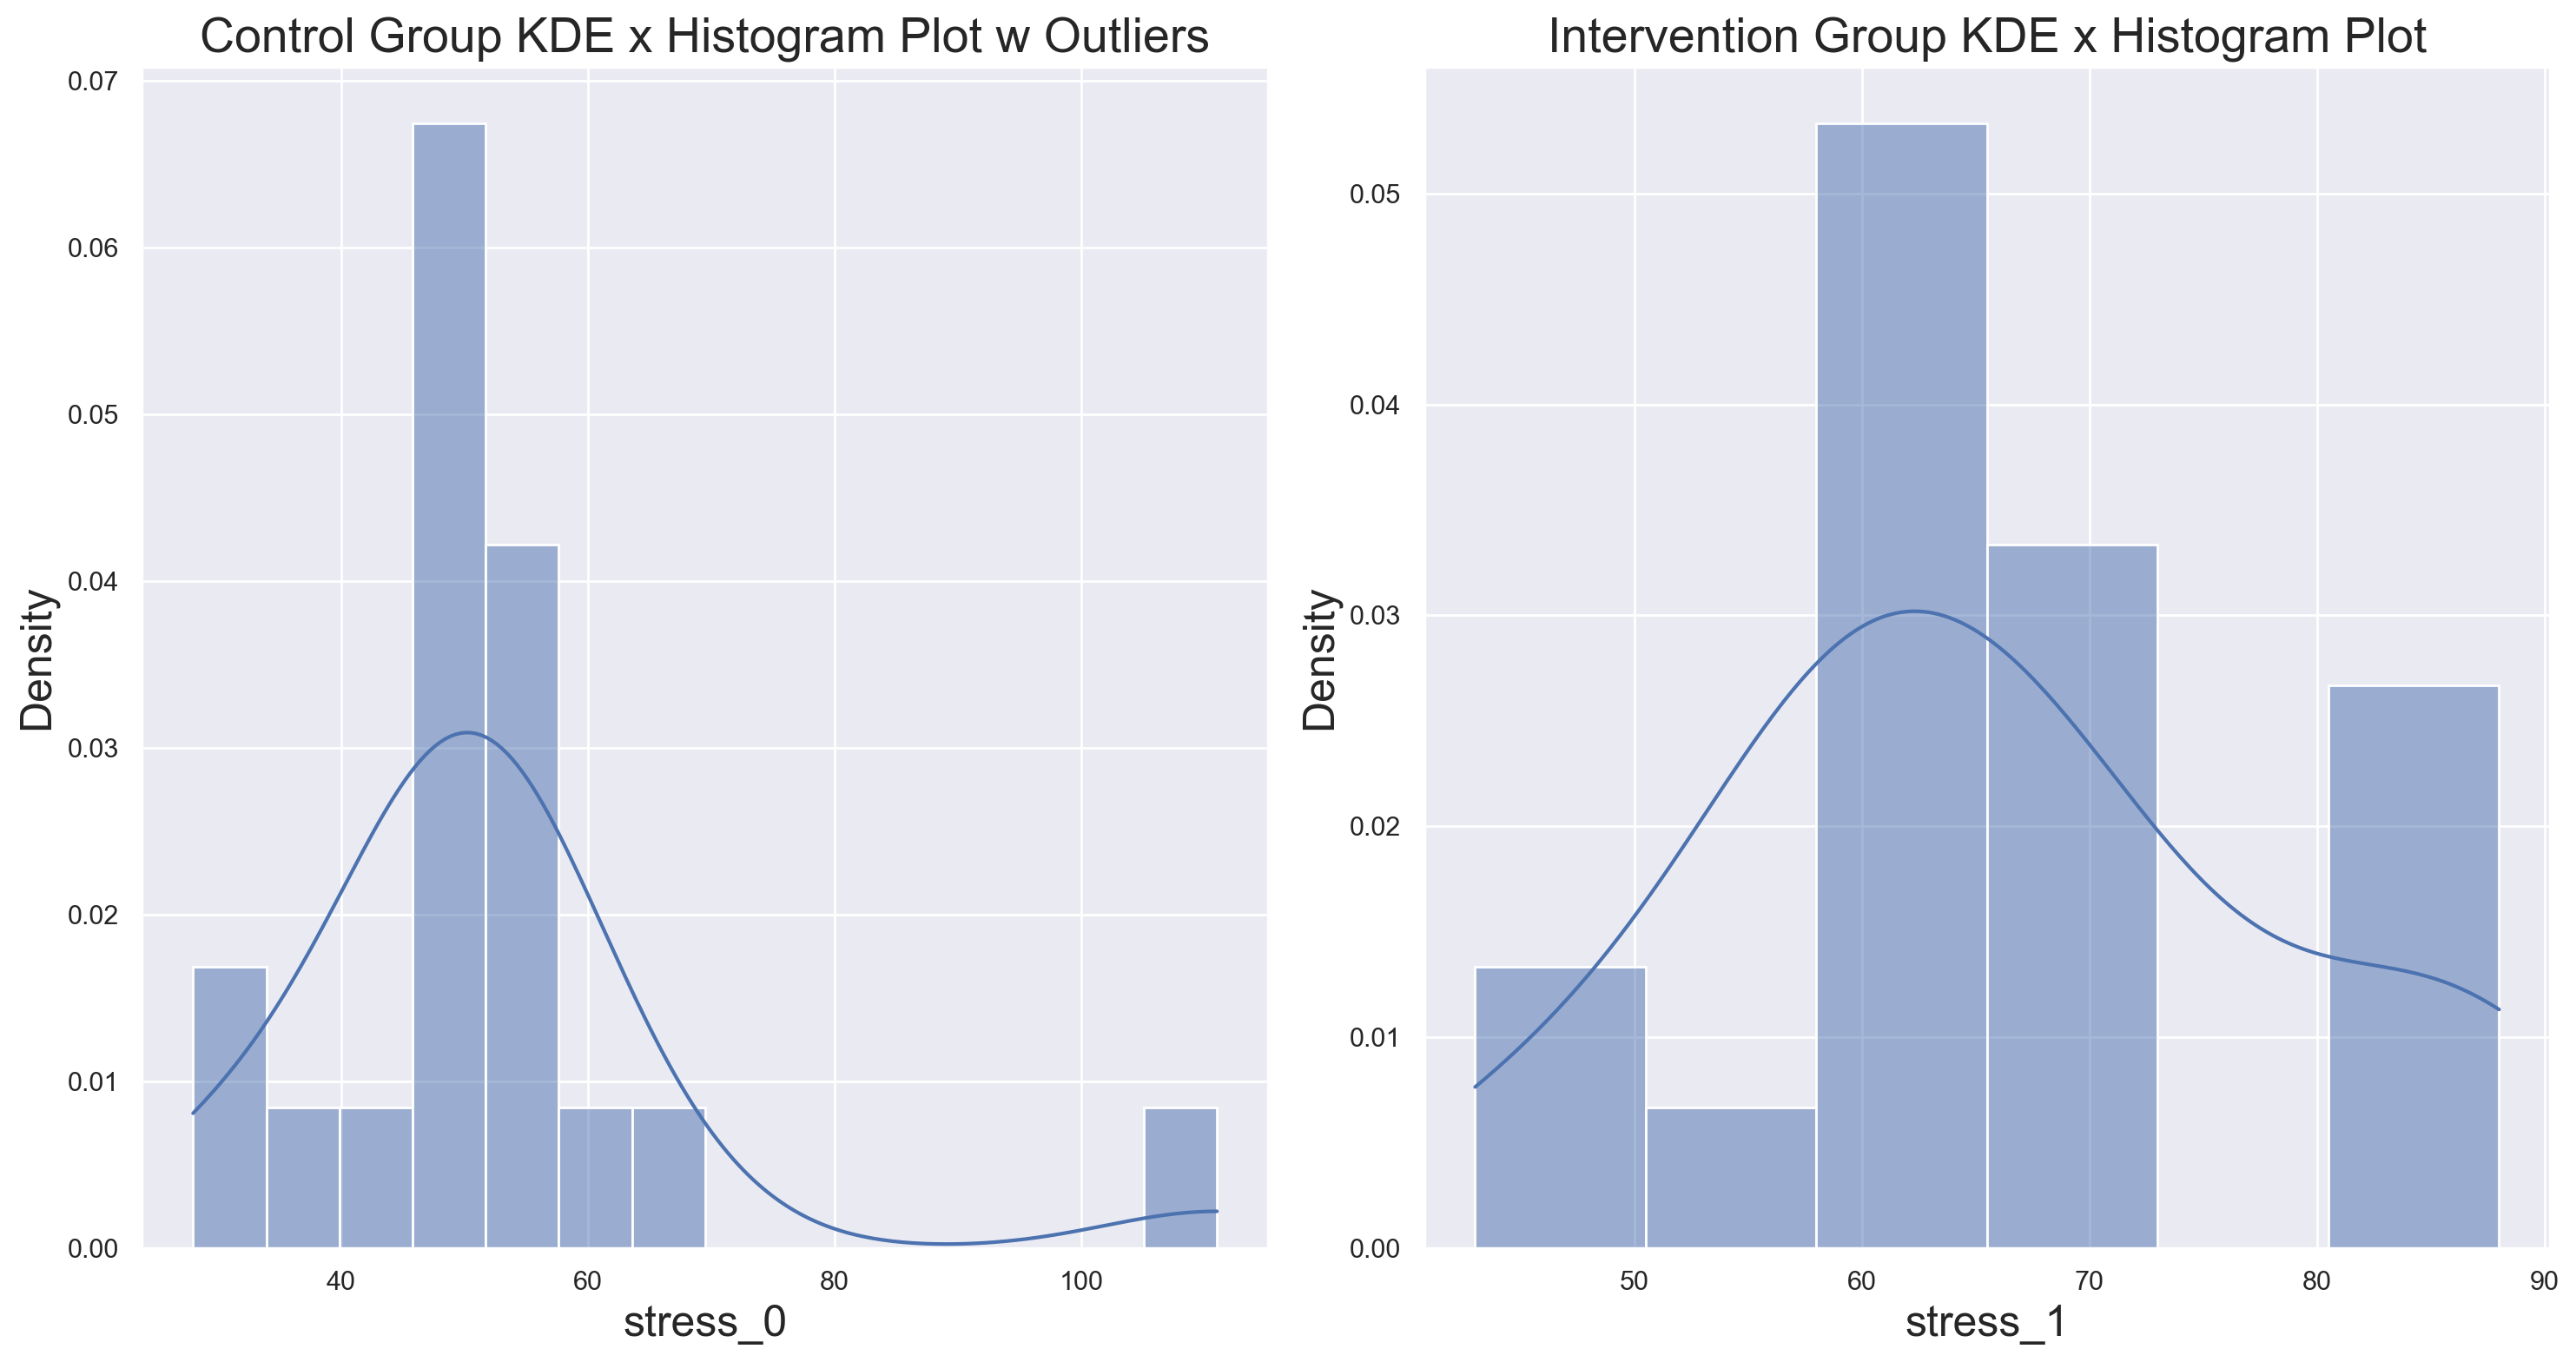

In [10]:
# visualizing distributions of data
cols = ["stress_0", "stress_1"]

fig, axes = plt.subplots(1, 2, figsize=(15,8), dpi=200)
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=df_merged[col], kde=True, stat='density', ax=ax)

axes[0].set_title("Control Group KDE x Histogram Plot w Outliers", fontsize=20)
axes[0].set_xlabel("stress_0", fontsize=18)
axes[0].set_ylabel("Density", fontsize=18)

axes[1].set_title("Intervention Group KDE x Histogram Plot", fontsize=20)
axes[1].set_xlabel("stress_1", fontsize=18)
axes[1].set_ylabel("Density", fontsize=18)

fig.tight_layout()
plt.show()

The kernel density x histogram plot for the control group is positively skewed. This is due to the outlier that is present in the data set. However, we will account for this outlier below and re-create the graph to see if there are any changes to the overall distribution values. Other observations seem to remain consistent with previously computed descriptive statistics.

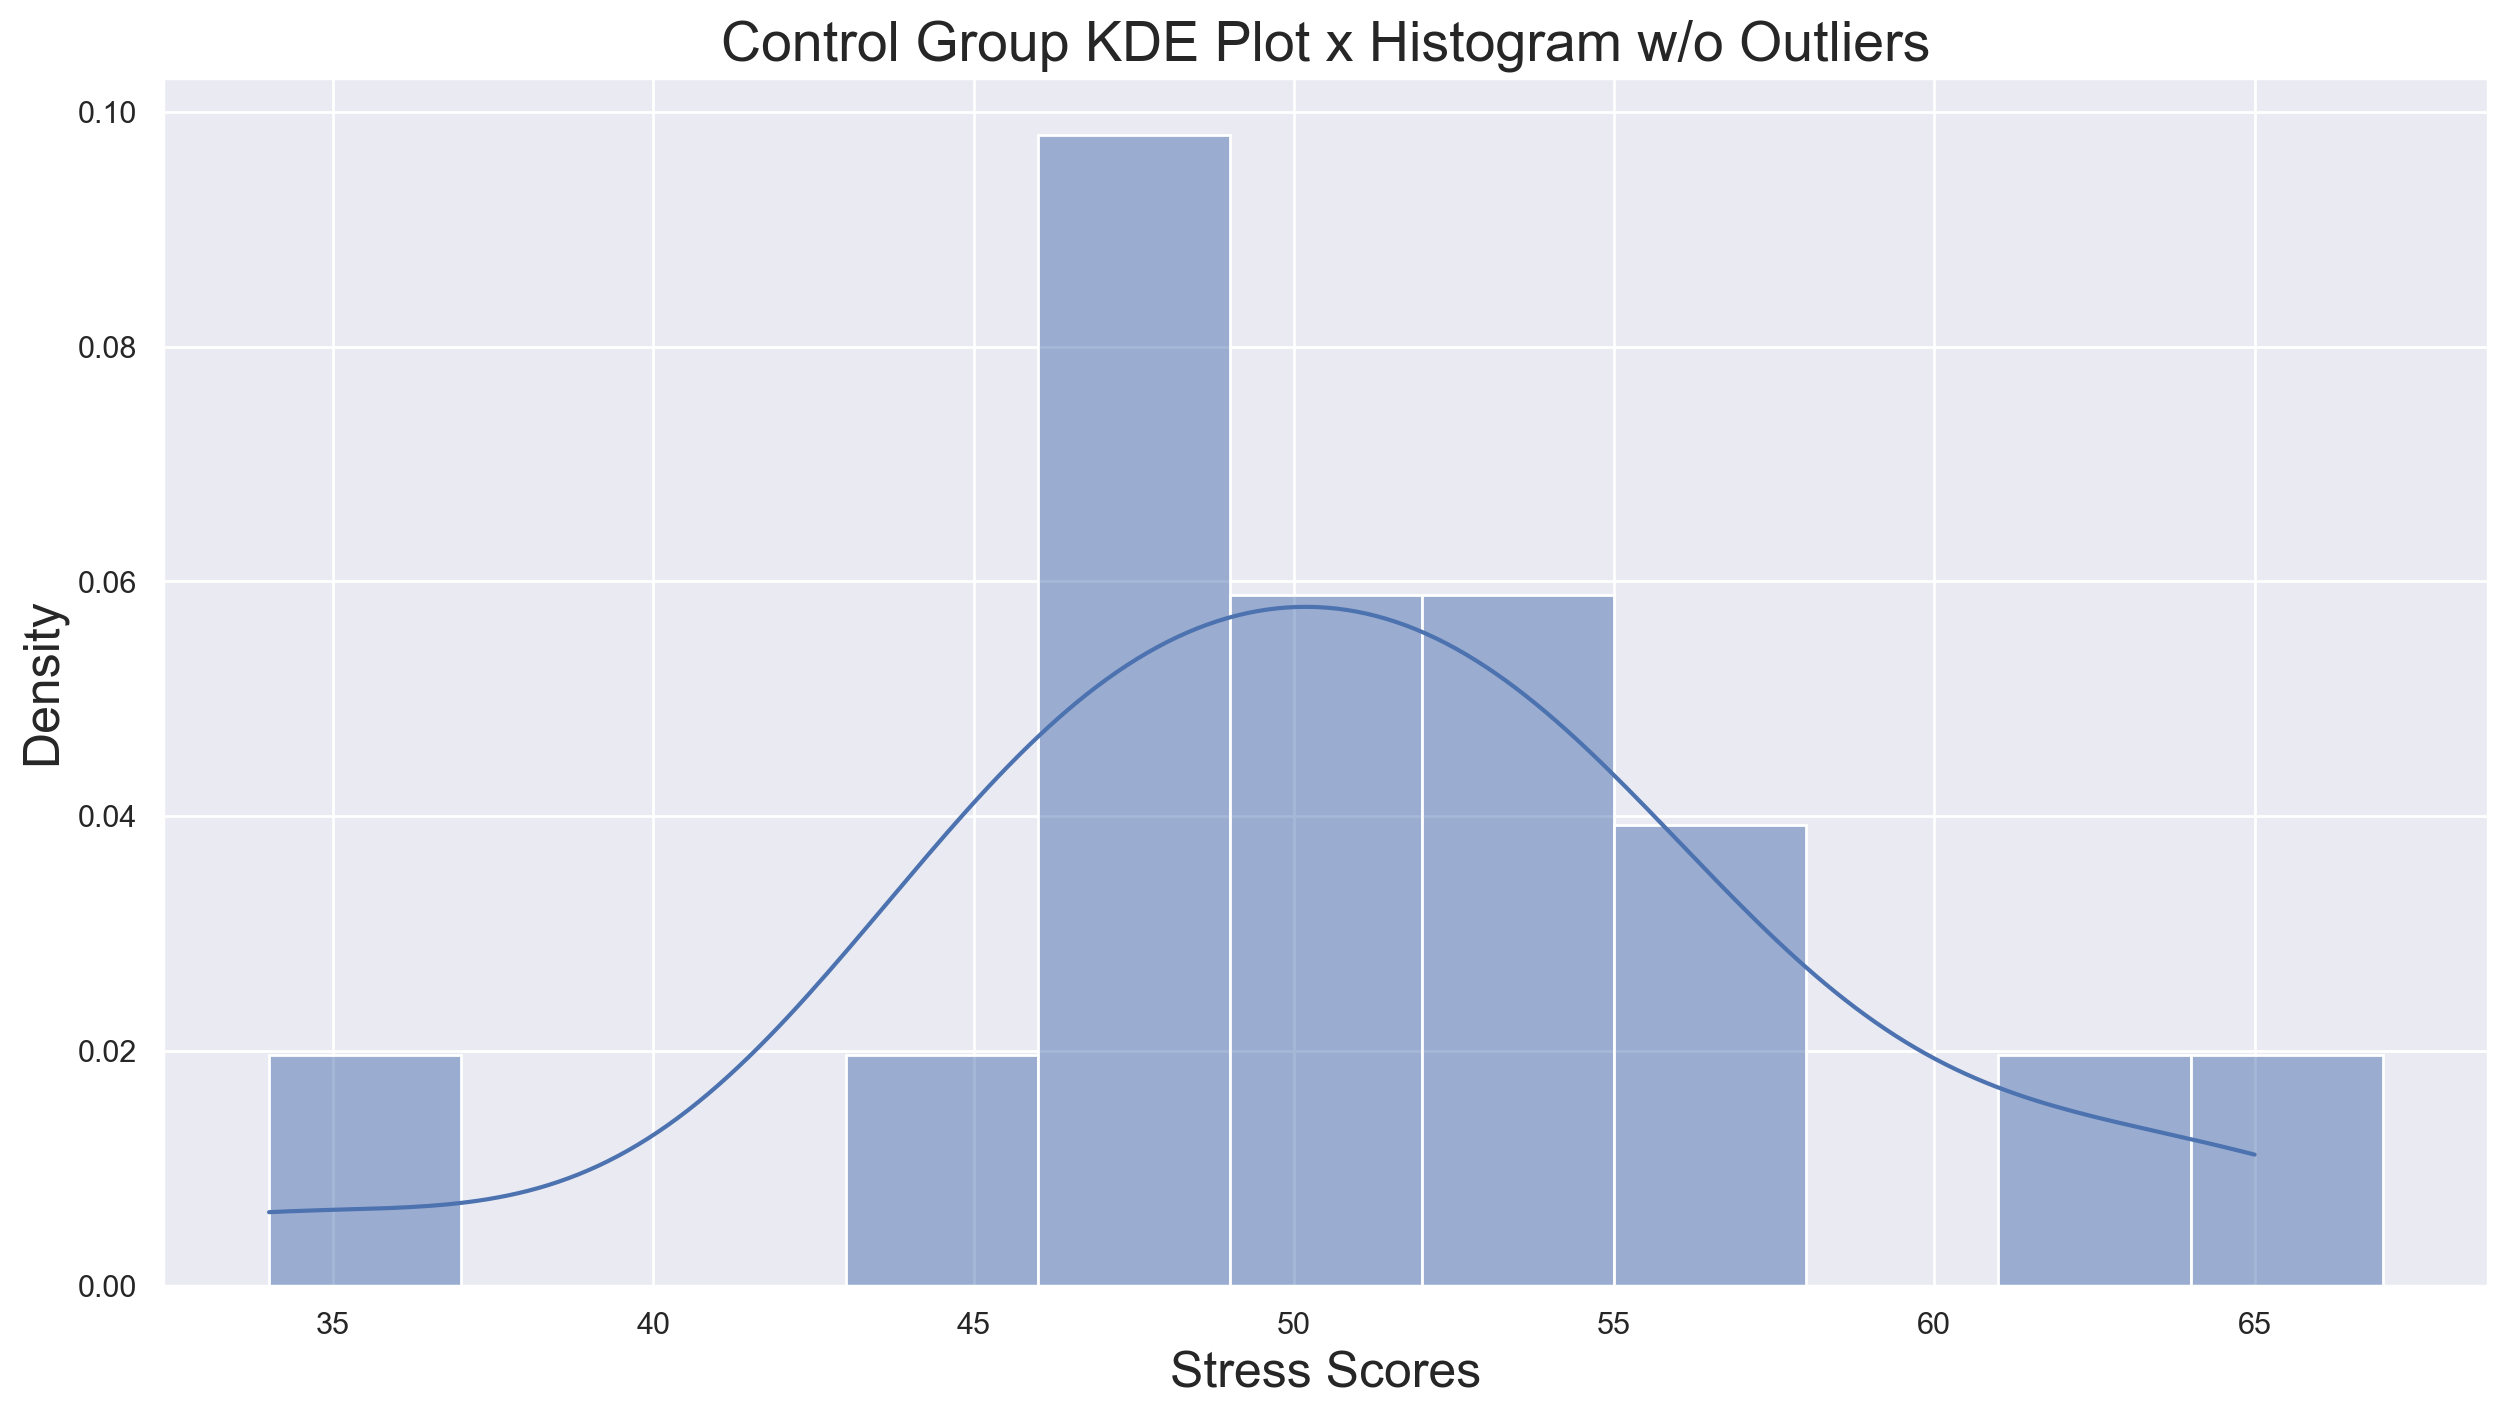

In [11]:
plt.figure(figsize=(15,8), dpi=200)

sns.histplot(data=df_merged["stress_0"].sort_values()[2:-1], binwidth=3, kde=True, stat='density')

plt.title("Control Group KDE Plot x Histogram w/o Outliers", fontsize=20)
plt.xlabel("Stress Scores", fontsize=18)
plt.ylabel("Density", fontsize=18)

plt.show()

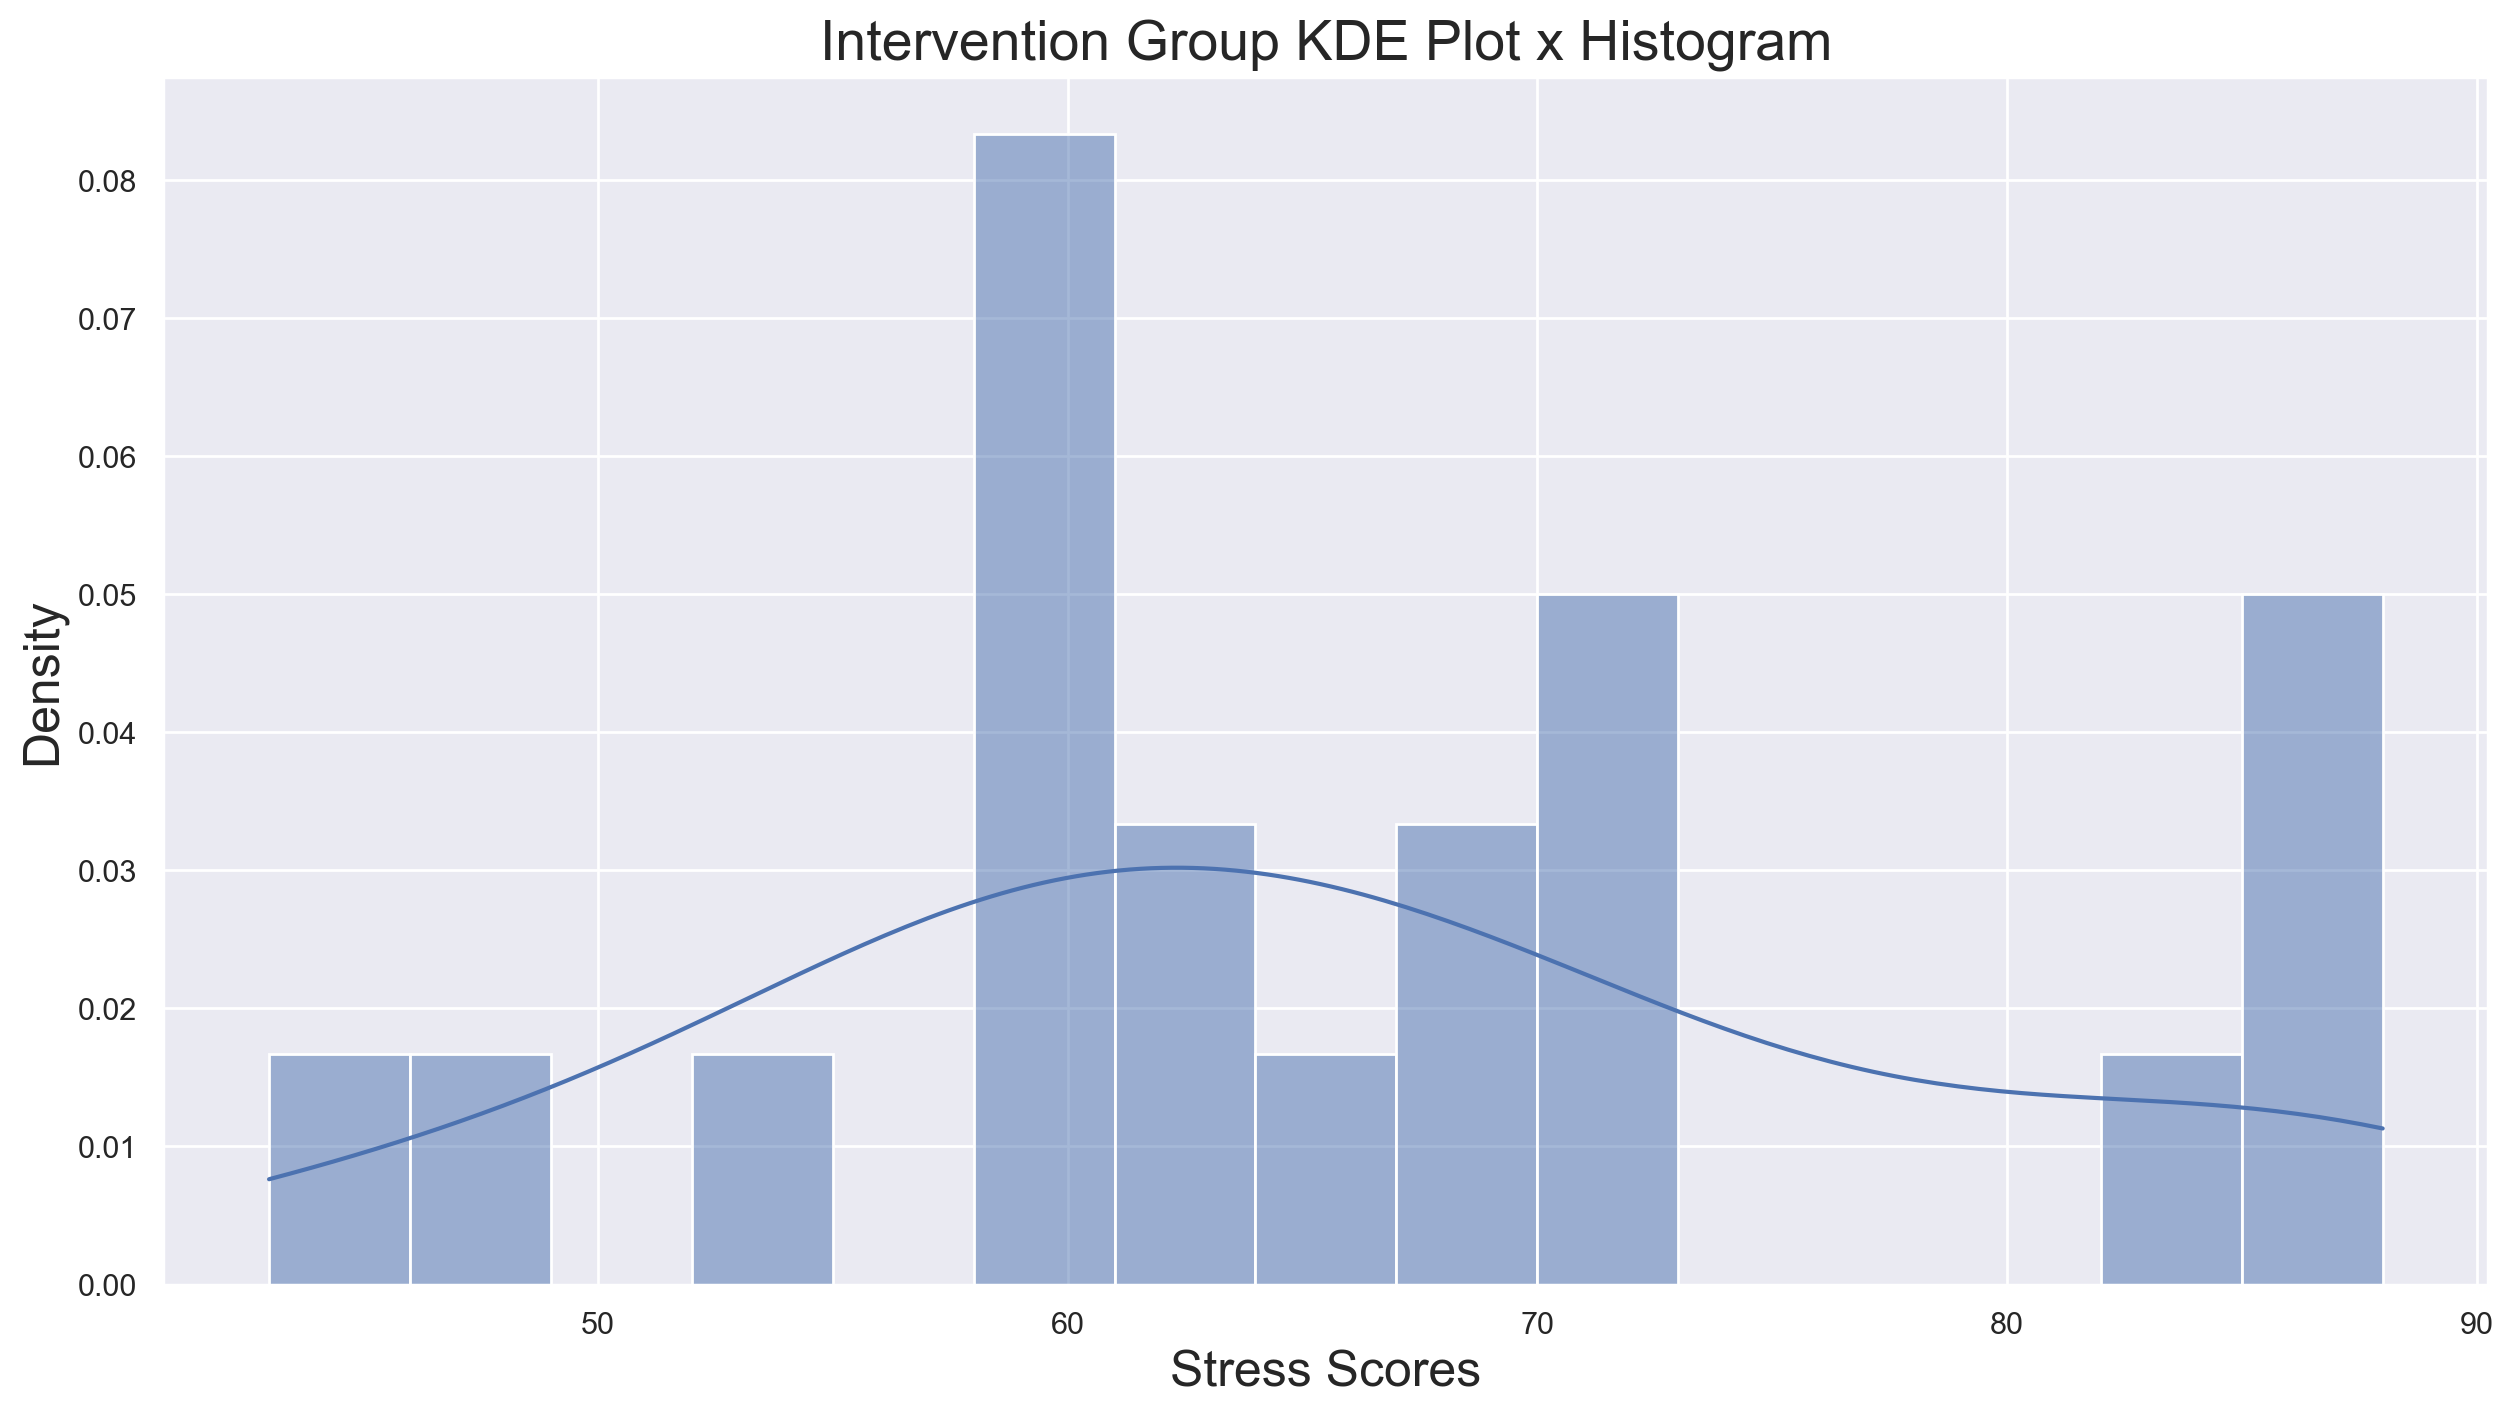

In [12]:
plt.figure(figsize=(15,8), dpi=200)

sns.histplot(data=df_merged["stress_1"], binwidth=3,kde=True, stat='density')

plt.title("Intervention Group KDE Plot x Histogram", fontsize=20)
plt.xlabel("Stress Scores", fontsize=18)
plt.ylabel("Density", fontsize=18)

plt.show()

The kernal density x Histogram plots of the 2 groups paints a similar picture to the previous computed descriptives statistics. Visualizing the distribution of the control group, we can see that the data is centered around 50, whereas the distribution of the intervention group is centered around approximately 65. This observation is consistent even after removing the outliers in the control group.

### Correlation Analysis:

The correlation shows the extent of interdependence between variables. A pearson coefficient of 0.44 indicates a positive linear relationship between the 2 variables, stress scores and which group the officer belongs to (control or intervention), with a weak to moderate interdependence being present emphasized by the coefficient of 0.44. At a 95% confidence level, the pearson correlation coefficient of 0.44 that was obtained is statistically significant.

In [13]:
from scipy import stats

x = data["Stress"]
y = data["Condition"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("CORRELATION ANALYSIS:\n")
print("Correlation Statistics".center(50,"="))
print(f"r_value: {round(r_value,4)}\nr_square: {round(r_value**2,4)}\np_value: {round(p_value,4)}\nstd_err: {round(std_err,4)}")
print("-"*50,"\n")

pearson_coef, p_value = stats.pearsonr(data["Condition"], data["Stress"])

print("Verifying computation: \n")
print("Verification Results".center(50,"="))
print(f"pearson correlation coefficient: {round(pearson_coef,4)}\np_value: {round(p_value,4)}")
print("-"*50)

if p_value < 0.05:
    print("*The p_value is statistically significant!")
else:
    print("*The p_value is statistically insignificant!")

CORRELATION ANALYSIS:

==============Correlation Statistics==============
r_value: 0.4431
r_square: 0.1963
p_value: 0.0042
std_err: 0.0045
-------------------------------------------------- 

Verifying computation: 

===============Verification Results===============
pearson correlation coefficient: 0.4431
p_value: 0.0042
--------------------------------------------------
*The p_value is statistically significant!


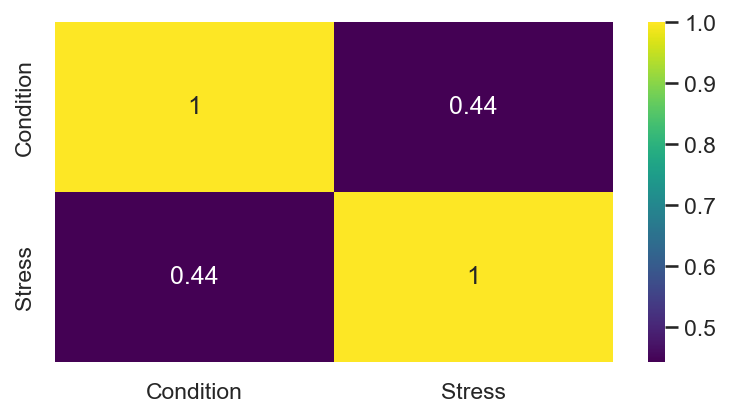

In [14]:
# visualizing correlation via heatmap
plt.figure(figsize=(6,3), dpi=150)
sns.heatmap(data.corr(), cmap="viridis", annot=True)

plt.show()

### ANOVA: Analysis of Variance (One-Way-Test)

The ANOVA test helps us determine whether statistically significant differences are present between the mean of 2 or more groups. The F-test score will tell us how the mean differs from the default assumption of the ANOVA test, which assumes that the mean of all groups are equivalent, where a larger deviation from the assumed mean indicates a larger difference in the 2 means of the groups in question. The p-value in turn will tell us if the reported F-test score is statistically significant. In our current test, we have assumed a significant level of 95%, therefore, a p-value of less than 0.05 is required to indicate that the F-test scores achieved are statistically significant.

If the stress scores are highly correlated with the group we are analyzing, we can expect the ANOVA test to produce a F-test score that is large and a small p-value that will substantiate the statistical significant of the test.

Hypothesis Test Assumptions:

- H0: no difference between the groups and equality between means
- H1: difference between means and groups

In [15]:
# change the mapping of 0 and 1 to "C" and "I"
data["Condition"] = data["Condition"].map({0:"C", 1:"I"})

# group data
group_data = data[["Condition", "Stress"]].groupby(["Condition"])

# Perform ANOVA test
f_val, p_val = stats.f_oneway(group_data.get_group("C")["Stress"], group_data.get_group("I")["Stress"])

print("ANOVA TEST 1:\n")
print("ANOVA RESULTS".center(30,"="))
print(f"F-Score = {round(f_val,4)}\np_value: {round(p_val,4)}")
print("-"*30)

if p_val < 0.05:
    print("*The p_value is statistically significant!")
else:
    print("*The p_value is statistically insignificant!")

ANOVA TEST 1:

========ANOVA RESULTS=========
F-Score = 9.2832
p_value: 0.0042
------------------------------
*The p_value is statistically significant!


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ols_model = ols("Stress ~ Condition", data=data).fit()
anova_test = sm.stats.anova_lm(ols_model, typ=2)

print("ANOVA TEST 2:\n")
print("ANOVA TEST VERIFICATION".center(50,"="))
print(anova_test)
print("-"*50)

if anova_test["PR(>F)"][0] < 0.05:
    print("*The p_value is statistically significant!")
else:
    print("*The p_value is statistically insignificant!")

ANOVA TEST 2:

=============ANOVA TEST VERIFICATION==============
           sum_sq    df        F    PR(>F)
Condition  2016.4   1.0  9.28316  0.004191
Residual   8254.0  38.0      NaN       NaN
--------------------------------------------------
*The p_value is statistically significant!


We can confirm the results in ANOVA test 1 by using the One-Way ANOVA test available to us in the statsmodels.api package and as you can see below that we have arrived at identical F-score and p-values. This indicates that we can reject the null hypothesis, as there is substantial evidence towards to alternative hypothesis, that is, there is a statistically significant difference between the means of the 2 groups. 

### Conclusions:

Therefore, based on the F-test statistic and the p-value, at a 95% confidence level, along with the other tests we have performed above, there does seem to be a difference between the 2 groups. That is, there is a difference in the results of the control and intervention groups, where the intervention groups have led to statistically significant positive increases in the officer's satifaction levels. This indicates that officers who adopt a physical routine, similar to that performed in the intervention group, will likely see positive improvements in their satifaction levels.